In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing Values in Each Column:
PLAYER    0
POS       0
AGE       2
SEASON    0
PS        0
dtype: int64

Summary Statistics:
                AGE            PS
count  23589.000000  23589.000000
mean      26.566620      2.424753
std        4.434402      2.798726
min       18.000000     -2.400000
25%       23.000000      0.100000
50%       26.000000      1.500000
75%       29.000000      4.000000
max       48.000000     18.200000


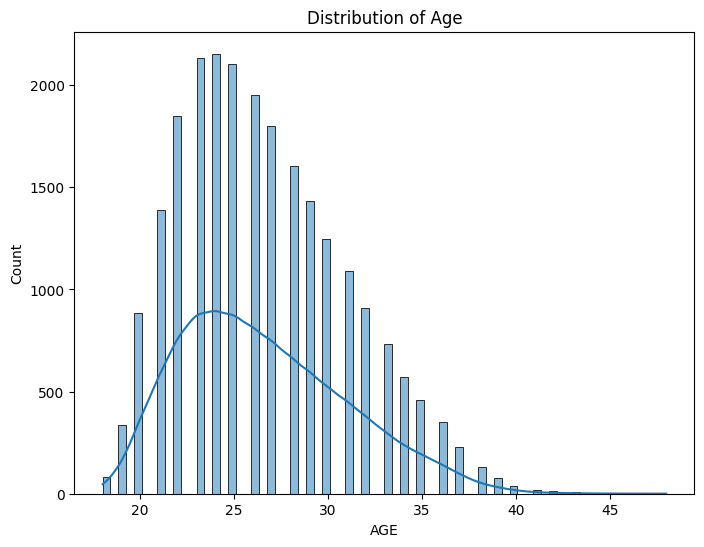

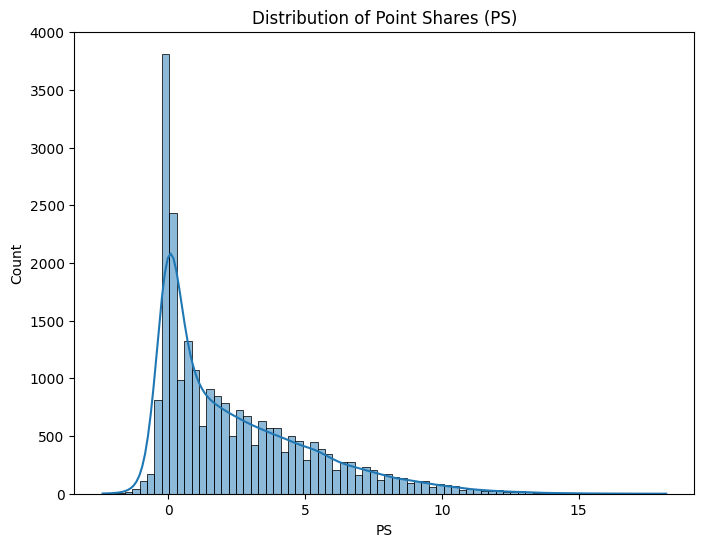


Average Point Shares (PS) by Position and Count of position:
      count        PS
POS                  
D    8152.0  2.805029
C    6605.0  2.294610
LW   4436.0  2.141524
RW   4240.0  2.249009
F     143.0  0.776923
W      13.0  2.176923


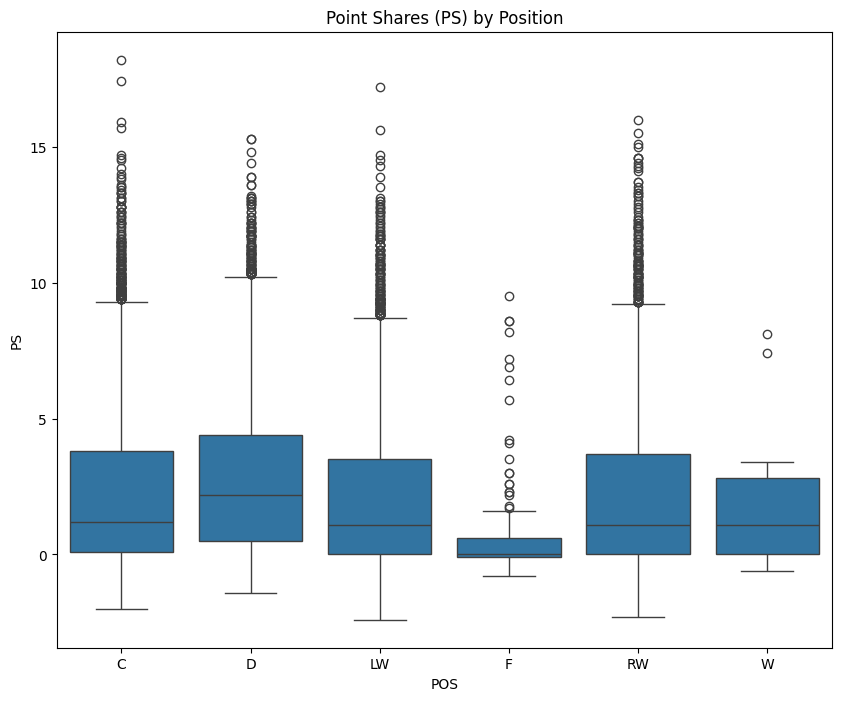


Top 10 Players with Highest Point Shares (PS):
               PLAYER POS  AGE  SEASON    PS
589    Connor McDavid   C   26    2023  18.2
23237  Mario Lemieux*   C   30    1996  17.4
14054   Alex Ovechkin  LW   22    2008  17.2
23139    Jaromír Jágr  RW   23    1996  16.0
19442      Joe Sakic*   C   31    2001  15.9
10441   Evgeni Malkin   C   25    2012  15.7
12313   Alex Ovechkin  LW   24    2010  15.6
15537    Jaromír Jágr  RW   33    2006  15.5
5644      Brent Burns   D   31    2017  15.3
1528       Cale Makar   D   23    2022  15.3


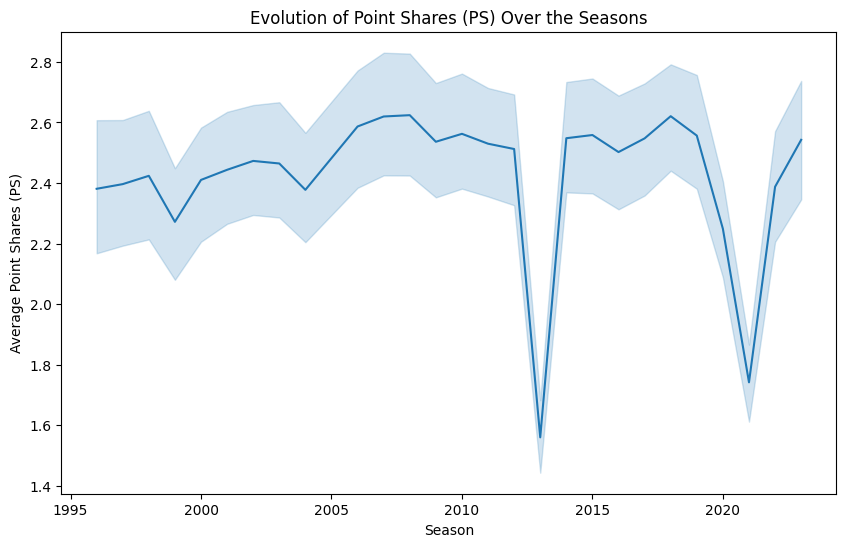

In [10]:
df_skaters = pd.read_csv("skaters_1996_2023.csv")
df_skaters = df_skaters[df_skaters['RK'] != 'Rk']

df_skaters = df_skaters[['PLAYER','POS','AGE','SEASON','PS']]
df_skaters['PS'] = df_skaters['PS'].astype('float64')

# Checking for missing values
print("Missing Values in Each Column:")
print(df_skaters.isnull().sum())

df_skaters = df_skaters.dropna()
df_skaters['AGE'] = df_skaters['AGE'].astype(int)

# Summary statistics
print("\nSummary Statistics:")
print(df_skaters.describe()[['AGE','PS']])

# Distribution of AGE
plt.figure(figsize=(8, 6))
sns.histplot(df_skaters['AGE'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of PS
plt.figure(figsize=(8, 6))
sns.histplot(df_skaters['PS'], kde=True)
plt.title('Distribution of Point Shares (PS)')
plt.show()

# Average PS by position
avg_ps_by_pos = df_skaters.groupby('POS')['PS'].mean().sort_values(ascending=False)
pos_counts = df_skaters['POS'].value_counts().astype(int)
print("\nAverage Point Shares (PS) by Position and Count of position:")
print(pd.DataFrame([pos_counts, avg_ps_by_pos]).transpose())

# Boxplot of PS by position
plt.figure(figsize=(10, 8))
sns.boxplot(x='POS', y='PS', data=df_skaters)
plt.title('Point Shares (PS) by Position')
plt.show()

# Top 10 players with highest PS
top_players = df_skaters.sort_values(by='PS', ascending=False).head(10)
print("\nTop 10 Players with Highest Point Shares (PS):")
print(top_players)

# Convert 'SEASON' to numeric
df_skaters['SEASON'] = df_skaters['SEASON'].astype(int)

# Plotting the evolution of PS over the seasons
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_skaters, x='SEASON', y='PS')
plt.title('Evolution of Point Shares (PS) Over the Seasons')
plt.xlabel('Season')
plt.ylabel('Average Point Shares (PS)')
plt.show()
